In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
training_data = pd.read_csv('./datasets/Train_Data.csv', index_col=0)
testing_data = pd.read_csv('./datasets/Test_Data.csv', index_col=0)

In [13]:
training_data = training_data.fillna(0)
testing_data = testing_data.fillna(0)

In [14]:
training_data.head()

,avg_VendorID_hour,avg_passenger_count_hour,avg_trip_distance_hour,avg_RatecodeID_hour,avg_fare_amount_hour,avg_extra_hour,avg_mta_tax_hour,avg_tip_amount_hour,avg_tolls_amount_hour,avg_improvement_surcharge_hour,...,avg_Brooklyn_DO_isna_hour,avg_Staten_Island_DO_isna_hour,avg_Mins_In_Ride_hour,Year,Month,Day,Hour,Minute,Second,avg_total_amount_hour
3098,1.239437,0.971831,4.546901,0.746479,15.863662,0.788732,0.5,0.536479,0.000000,0.3,...,0.0,0.0,13.298592,2020.0,5.0,9.0,3.0,0.0,0.0,18.904366
699,1.665800,1.488947,2.949376,0.990897,11.144590,1.227243,0.5,1.546125,0.000000,0.3,...,0.0,0.0,9.815397,2020.0,1.0,30.0,4.0,0.0,0.0,16.287464
1415,1.690328,1.588607,2.415337,0.998443,10.763609,1.228893,0.5,2.022124,0.001377,0.3,...,0.0,0.0,11.948955,2020.0,2.0,29.0,0.0,0.0,0.0,16.463901
3413,1.066667,0.890909,3.840424,0.666667,13.259091,0.924242,0.5,0.813152,0.000000,0.3,...,0.0,0.0,10.926788,2020.0,5.0,22.0,6.0,0.0,0.0,17.020424
1754,1.695288,1.598855,2.505821,0.998679,10.019269,1.199031,0.5,1.622770,0.000000,0.3,...,0.0,0.0,9.339326,2020.0,3.0,14.0,3.0,0.0,0.0,15.223831


In [15]:
X_train = training_data.drop(['avg_total_amount_hour'], axis=1)
X_test = testing_data.drop(['avg_total_amount_hour'], axis=1)
y_train = training_data[['avg_total_amount_hour']]
y_test = testing_data[['avg_total_amount_hour']]

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
residuals = y_test - y_pred
residuals

,avg_total_amount_hour
3360,0.062607
4190,-0.004339
2314,0.015682
401,0.000006
3033,-0.030476
...,...
4098,-0.009264
4184,-0.002019
2634,0.039162
335,0.008755


In [48]:
testing_data.dtypes

avg_VendorID_hour                 float64
avg_passenger_count_hour          float64
avg_trip_distance_hour            float64
avg_RatecodeID_hour               float64
avg_fare_amount_hour              float64
avg_extra_hour                    float64
avg_mta_tax_hour                  float64
avg_tip_amount_hour               float64
avg_tolls_amount_hour             float64
avg_improvement_surcharge_hour    float64
avg_congestion_surcharge_hour     float64
avg_Bronx_PU_hour                 float64
avg_Brooklyn_PU_hour              float64
avg_Manhattan_PU_hour             float64
avg_Queens_PU_hour                float64
avg_Staten_Island_PU_hour         float64
avg_Bronx_DO_hour                 float64
avg_Brooklyn_DO_hour              float64
avg_Manhattan_DO_hour             float64
avg_Queens_DO_hour                float64
avg_Staten_Island_DO_hour         float64
avg_VendorID_isna_hour            float64
avg_passenger_count_isna_hour     float64
avg_RatecodeID_isna_hour          

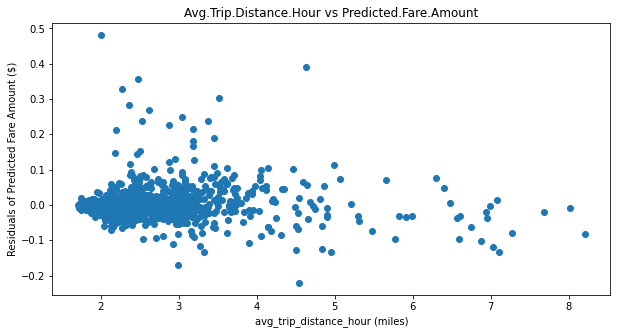

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(x=X_test['avg_trip_distance_hour'], y=residuals)
plt.xlabel('avg_trip_distance_hour (miles)')
plt.ylabel('Residuals of Predicted Fare Amount ($)')
plt.title('Avg.Trip.Distance.Hour vs Predicted.Fare.Amount')
plt.show()

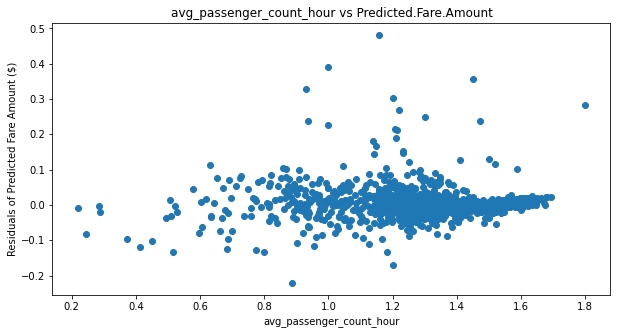

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(x=X_test['avg_passenger_count_hour'], y=residuals)
plt.xlabel('avg_passenger_count_hour')
plt.ylabel('Residuals of Predicted Fare Amount ($)')
plt.title('avg_passenger_count_hour vs Predicted.Fare.Amount')
plt.show()

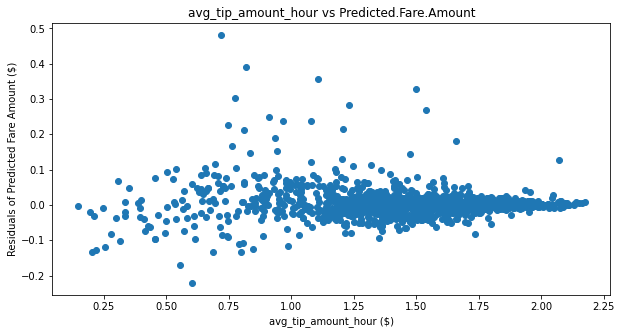

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(x=X_test['avg_tip_amount_hour'], y=residuals)
plt.xlabel('avg_tip_amount_hour ($)')
plt.ylabel('Residuals of Predicted Fare Amount ($)')
plt.title('avg_tip_amount_hour vs Predicted.Fare.Amount')
plt.show()

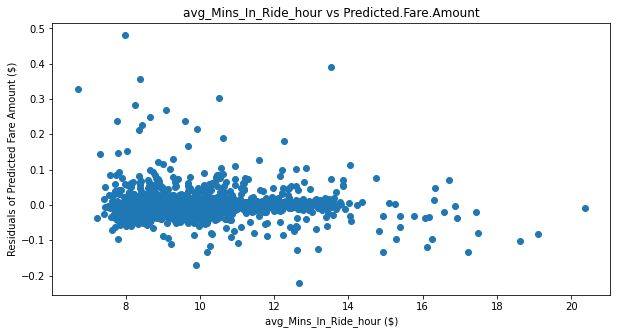

In [39]:
plt.figure(figsize=(10, 5))
plt.scatter(x=X_test['avg_Mins_In_Ride_hour'], y=residuals)
plt.xlabel('avg_Mins_In_Ride_hour ($)')
plt.ylabel('Residuals of Predicted Fare Amount ($)')
plt.title('avg_Mins_In_Ride_hour vs Predicted.Fare.Amount')
plt.show()